![bmw_logo](BMW-Logo-2020-present.jpg)

In [285]:
import pandas as pd
import numpy as np
import re
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import seaborn as sns

In [286]:
df = pd.read_csv(
    filepath_or_buffer="bmw.csv"
)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


### 🚗 SECTION 1 — Price Landscape & Distribution

#### Overall Price Distribution

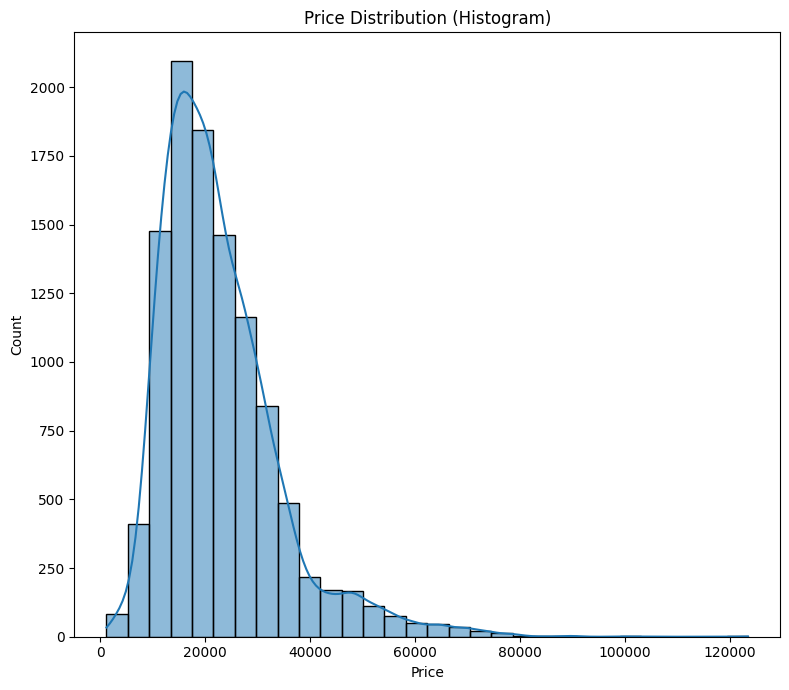

In [288]:
title = "Distribution of Price"

plt.figure(figsize=(8, 7))

sns.histplot(
    df["price"],
    bins=30,
    kde=True
)

plt.title("Price Distribution (Histogram)")
plt.ylabel("Count")
plt.xlabel("Price")

plt.tight_layout()

filename = "figures/price_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Price by Year

In [289]:
stats = (
    df
    .groupby(by="year")
    .agg(mean_price=("price", "mean"))
    .reset_index()
)

In [290]:
stats

,year,mean_price
0,1996,5995.000000
1,1997,3950.000000
2,1998,3950.000000
3,1999,3285.000000
4,2000,1624.500000
5,2001,7333.333333
6,2002,5486.500000
7,2003,9222.500000
8,2004,8213.166667
9,2005,5390.166667


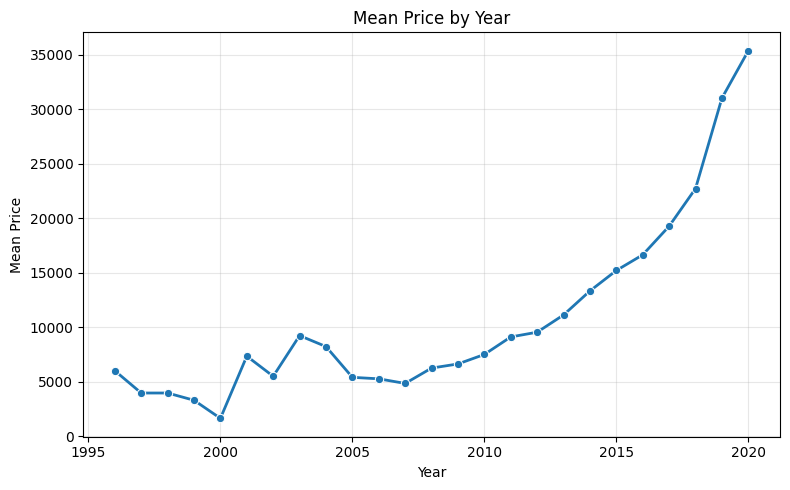

In [291]:
title = "Mean Price by Year"

plt.figure(figsize=(8, 5))

sns.lineplot(
    data=stats,
    x="year",
    y="mean_price",
    marker="o",
    linewidth=2
)

plt.xlabel("Year")
plt.ylabel("Mean Price")
plt.title(title)
plt.grid(alpha=0.3)
plt.tight_layout()

filename = "figures/mean_price_by_year.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Price by Transmission Type

In [292]:
df["transmission"].value_counts()

transmission
Semi-Auto    4666
Automatic    3588
Manual       2527
Name: count, dtype: int64

In [293]:
manual = df[df["transmission"] == "Manual"]
automatic = df[df["transmission"] == "Automatic"]
semi_auto = df[df["transmission"] == "Semi-Auto"] 

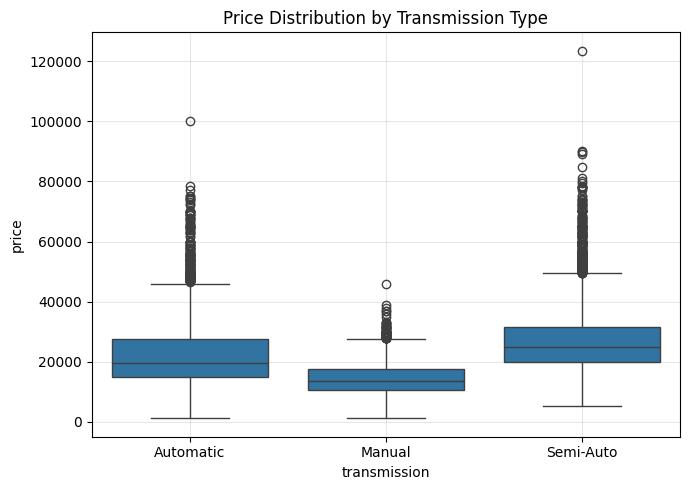

In [294]:
title = "Price Distribution by Transmission Type"

plt.figure(figsize=(7, 5))

sns.boxplot(
    data=df,
    x="transmission",
    y="price"
)

plt.title(title)
plt.grid(alpha=0.3)
plt.tight_layout()

filename = "figures/price_distribution_by_transmission_type.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()


### 🏎️ SECTION 2 — Mileage, Age & Depreciation Effects

#### Mileage Distribution

In [295]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0


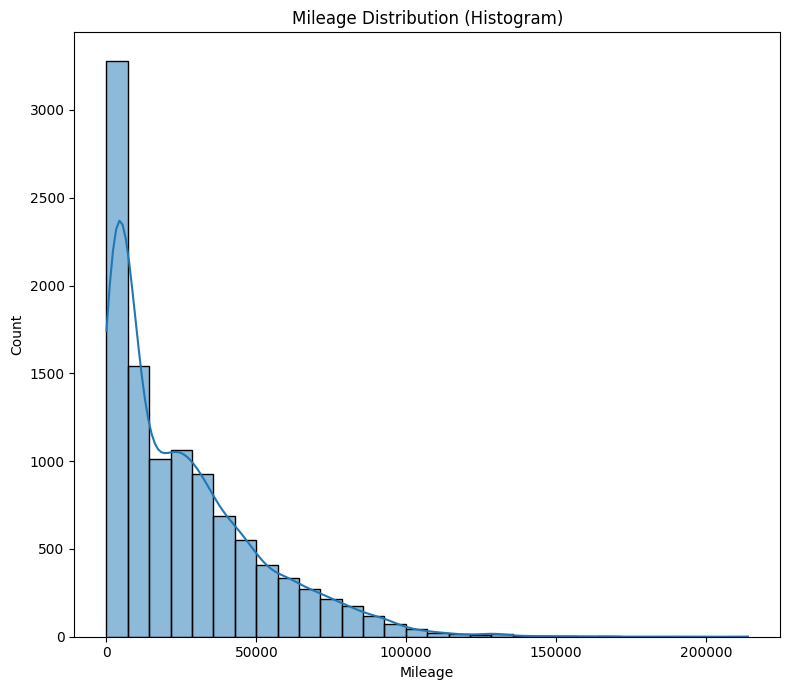

In [296]:
title = "Distribution of Mileage"

plt.figure(figsize=(8, 7))

sns.histplot(
    df["mileage"],
    bins=30,
    kde=True
)

plt.title("Mileage Distribution (Histogram)")
plt.ylabel("Count")
plt.xlabel("Mileage")

plt.tight_layout()

filename = "figures/mileage_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Mileage vs Price Relationship

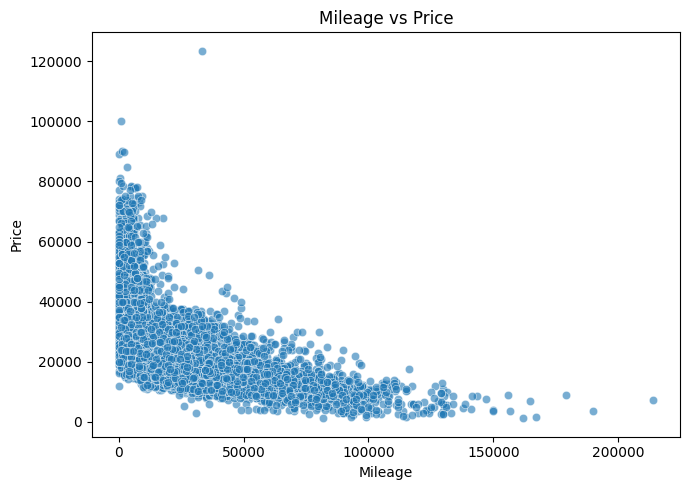

In [297]:
title = "Mileage vs Price"

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df,
    x="mileage",
    y="price",
    alpha=0.6
)

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title(title)
plt.tight_layout()

filename = "figures/mileage_vs_price.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Car Age vs Mileage

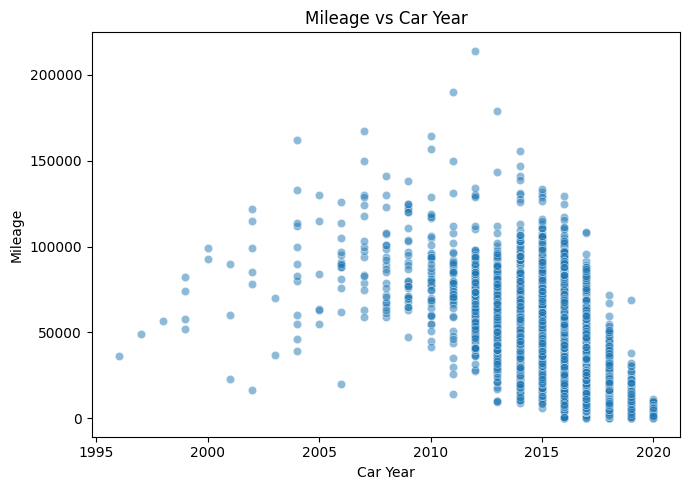

In [298]:
title = "Mileage vs Car Year"

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df,
    x="year",
    y="mileage",
    alpha=0.5
)

plt.xlabel("Car Year")
plt.ylabel("Mileage")
plt.title(title)
plt.tight_layout()

filename = "figures/mileage_vs_year.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()


#### Depreciation Buckets

In [299]:
mileage_bins = pd.qcut(
    df["mileage"],
    q=4,
    duplicates="drop",
    labels=["low", "medium", "high", "very high"]
)

df["mileage_flag"] = mileage_bins

In [300]:
df["mileage_flag"].value_counts()

mileage_flag
low          2696
medium       2695
high         2695
very high    2695
Name: count, dtype: int64

In [301]:
stats = (
    df
    .groupby(by="mileage_flag", observed=True)
    .agg(mean_price=("price", "mean"))
    .reset_index()
)

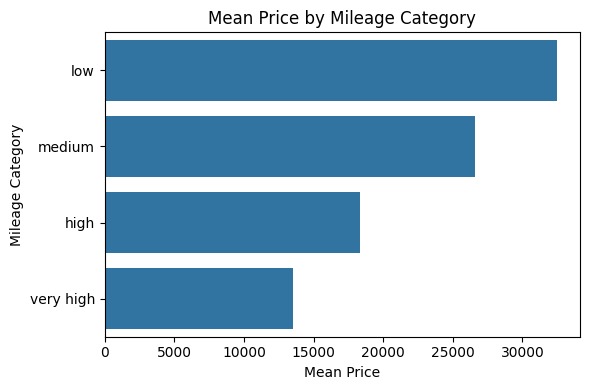

In [302]:
title = "Mean Price by Mileage Category"

plt.figure(figsize=(6, 4))

sns.barplot(
    data=stats,
    x="mean_price",
    y="mileage_flag"
)

plt.xlabel("Mean Price")
plt.ylabel("Mileage Category")
plt.title(title)
plt.tight_layout()

filename = "figures/mean_price_by_mileage_category.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()


### ⛽ SECTION 3 — Fuel Type & Efficiency Analysis

#### Fuel Type Popularity

In [303]:
df.head(1)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage_flag
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,very high


In [304]:
stats = (
    df
    .groupby(by="fuelType")
    .agg(cars=("fuelType", "count"))
    .sort_values(by="cars", ascending=False)
    .reset_index()
)

stats

,fuelType,cars
0,Diesel,7027
1,Petrol,3417
2,Hybrid,298
3,Other,36
4,Electric,3


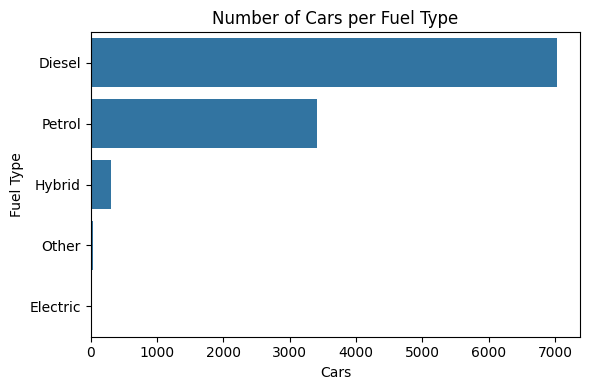

In [305]:
title = "Number of Cars per Fuel Type"

plt.figure(figsize=(6, 4))

sns.barplot(
    data=stats,
    x="cars",
    y="fuelType"
)

plt.xlabel("Cars")
plt.ylabel("Fuel Type")
plt.title(title)
plt.tight_layout()

filename = "figures/cars_by_fuel_type.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Fuel Type vs Price

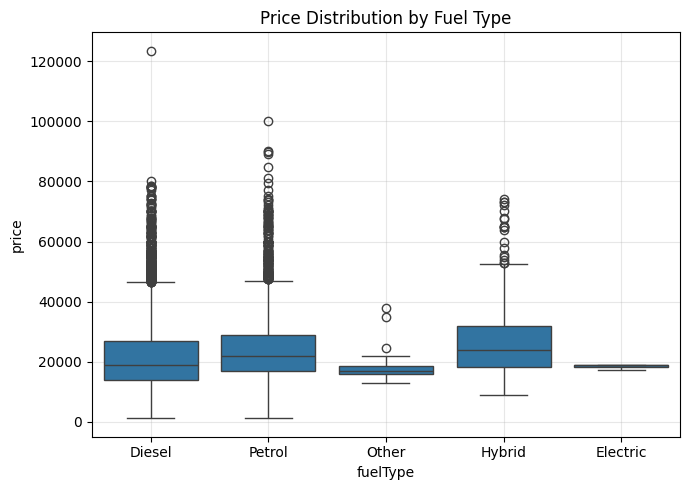

In [306]:
title = "Price Distribution by Fuel Type"

plt.figure(figsize=(7, 5))

sns.boxplot(
    data=df,
    x="fuelType",
    y="price"
)

plt.title(title)
plt.grid(alpha=0.3)
plt.tight_layout()

filename = "figures/price_distribution_by_fuel_type.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### MPG Distribution

In [307]:
df_cut = df[df["mpg"] < 100]

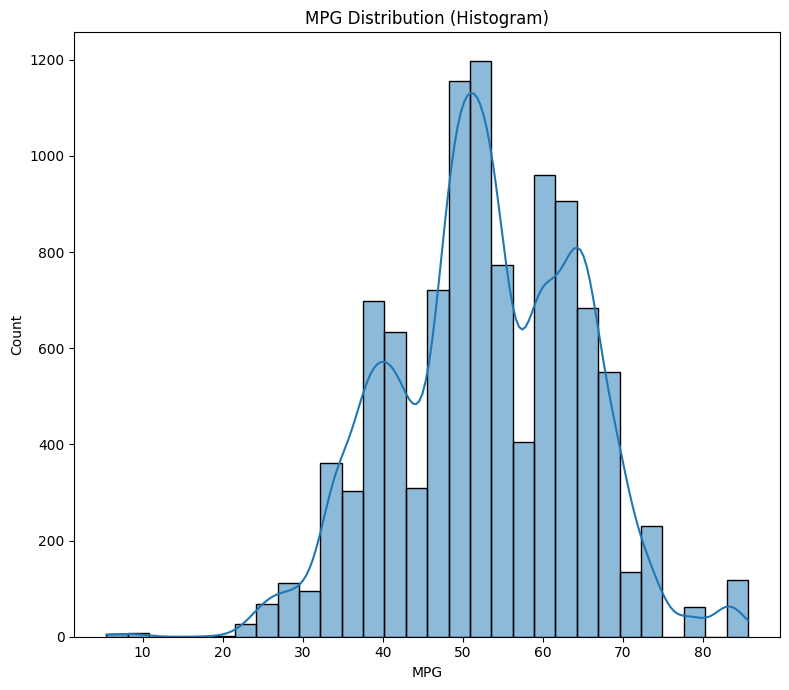

In [308]:
title = "MPG Distribution"

plt.figure(figsize=(8, 7))

sns.histplot(
    df_cut["mpg"],
    bins=30,
    kde=True
)

plt.title("MPG Distribution (Histogram)")
plt.ylabel("Count")
plt.xlabel("MPG")

plt.tight_layout()

filename = "figures/mpg_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### MPG vs Price Trade-off

In [309]:
df_cut = df[df["mpg"] < 100]

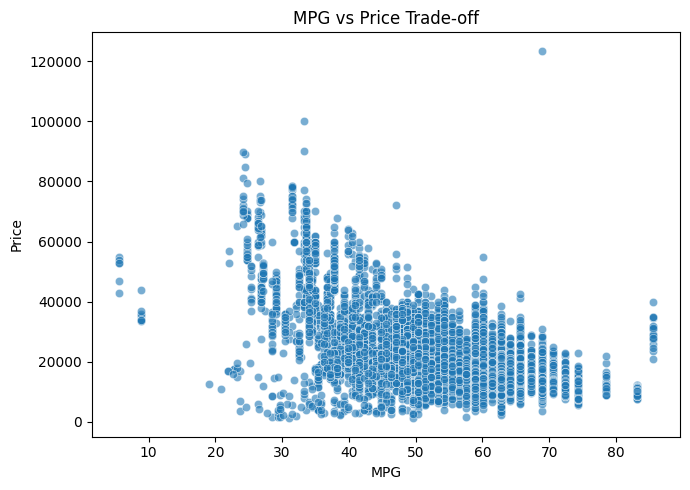

In [310]:
title = "MPG vs Price Trade-off"

plt.figure(figsize=(7, 5))

sns.scatterplot(
    data=df_cut,
    x="mpg",
    y="price",
    alpha=0.6
)

plt.xlabel("MPG")
plt.ylabel("Price")
plt.title(title)
plt.tight_layout()

filename = "figures/mpg_vs_price.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

### ⚙️ SECTION 4 — Engine & Performance Signals

#### Engine Size Distribution

In [311]:
top10 = (
    df["engineSize"]
    .value_counts()
    .head(10)
    .reset_index()
)

top10


,engineSize,count
0,2.0,6575
1,3.0,2458
2,1.5,1463
3,1.6,109
4,4.4,79
5,0.0,47
6,2.5,14
7,0.6,7
8,2.2,6
9,4.0,6


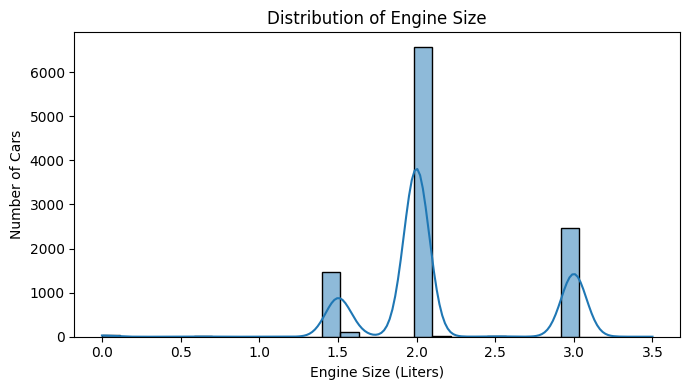

In [312]:
df_cut = df[df["engineSize"] < 4.0]

title = "Distribution of Engine Size"

plt.figure(figsize=(7, 4))

sns.histplot(
    df_cut["engineSize"],
    bins=30,
    kde=True
)

plt.xlabel("Engine Size (Liters)")
plt.ylabel("Number of Cars")
plt.title(title)
plt.tight_layout()

filename = "figures/engine_size_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Engine Size vs Price

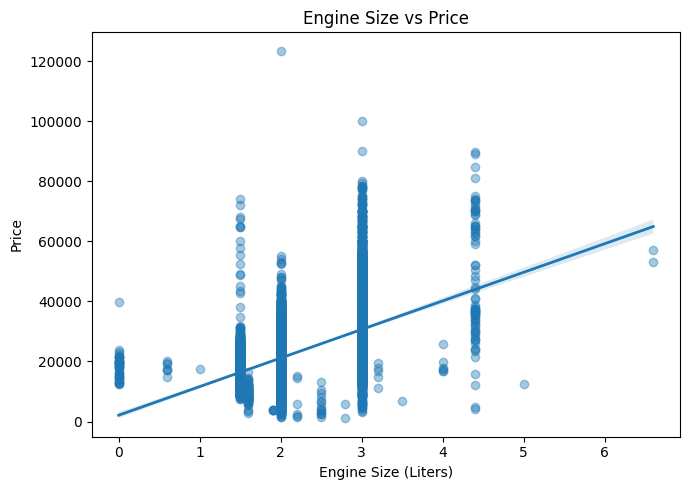

In [313]:
title = "Engine Size vs Price"

plt.figure(figsize=(7, 5))

sns.regplot(
    data=df,
    x="engineSize",
    y="price",
    scatter_kws={"alpha": 0.4},
    line_kws={"linewidth": 2}
)

plt.xlabel("Engine Size (Liters)")
plt.ylabel("Price")
plt.title(title)
plt.tight_layout()

filename = "figures/engine_size_vs_price.png"
plt.savefig(filename, dpi=300, bbox_inches="tight")
plt.show()

#### Performance Segmentation

In [314]:
df["engine_segment"] = pd.qcut(
    df["engineSize"],
    q=5,
    duplicates="drop",
)

In [315]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mileage_flag,engine_segment
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,very high,"(-0.001, 2.0]"
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,medium,"(-0.001, 2.0]"
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,very high,"(2.0, 3.0]"
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,high,"(-0.001, 2.0]"
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,very high,"(2.0, 3.0]"


In [316]:
df["engine_segment"].value_counts()

engine_segment
(-0.001, 2.0]    8207
(2.0, 3.0]       2480
(3.0, 6.6]         94
Name: count, dtype: int64

In [317]:
stats = (
    df
    .groupby(by="engine_segment", observed=True)
    .agg(
        mean_price=("price", "mean"),
        mean_mpg=("mpg", "mean")
    )
)

stats["mean_price"] = np.round(stats["mean_price"], 2)
stats["mean_mpg"] = np.round(stats["mean_mpg"], 2)

In [318]:
stats

,mean_price,mean_mpg
engine_segment,,
"(-0.001, 2.0]",19909.79,60.65
"(2.0, 3.0]",31318.98,43.46
"(3.0, 6.6]",42746.46,26.82


### 💾 Saving Plots

In [319]:
source = "source: https://www.kaggle.com/datasets/thedrzee/bmw-carsdataset\n"

with open("README.md", "w+") as readme:
    readme.write(source)

In [320]:
all_plots = os.listdir("figures")
print(all_plots)

with open("README.md", "a") as readme:    
    for plot in all_plots:
        if plot.endswith(".png"):
            description = (
                plot
                .replace(".png", "")
                .replace("_", " ")
                .capitalize()
            )
            readme.write(f"\n{description}\n")

            new_line = f"![{plot.replace('.png', '')}](figures/{plot})\n"
            readme.write(new_line)


['cars_by_fuel_type.png', 'engine_size_distribution.png', 'engine_size_vs_price.png', 'mean_price_by_mileage_category.png', 'mean_price_by_year.png', 'mileage_distribution.png', 'mileage_vs_price.png', 'mileage_vs_year.png', 'mpg_distribution.png', 'mpg_vs_price.png', 'price_distribution.png', 'price_distribution_by_fuel_type.png', 'price_distribution_by_transmission_type.png']
